In [444]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K
import matplotlib.pyplot as plt

In [445]:
df = pd.read_csv("./dataset/Consumo_cerveja.csv")
df.columns = map(str.lower, df.columns)

print(len(df))

df[:10]

365


,data,temperatura media (c),temperatura minima (c),temperatura maxima (c),precipitacao (mm),final de semana,consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1,29.799
4,2015-01-05,"23,82",21,"28,3",0,0,28.900
5,2015-01-06,"23,78","20,1","30,5","12,2",0,28.218
6,2015-01-07,24,"19,5","33,7",0,0,29.732
7,2015-01-08,"24,9","19,5","32,8","48,6",0,28.397
8,2015-01-09,"28,2","21,9",34,"4,4",0,24.886
9,2015-01-10,"26,76","22,1","34,2",0,1,37.937


# 1 - Pré-processamento

## 1.1 - Remover data

In [446]:
df = df.drop(columns=['data'])

## 1.2 - Converter Números para Float

In [447]:
df = df.replace(",", ".",regex=True)
df = df.applymap(lambda x: float(x))

## 1.3 - Normalizar os dados

In [448]:
scaler = MinMaxScaler(feature_range = (0,1))

for column in list(df):
    scaled = scaler.fit_transform(df[column].values.reshape(-1, 1))

    df[column] = scaled

## 2 - Treinamento

## 2.1 - Dados de treinamento e teste

In [449]:
df_train = df[:int(len(df) * 0.8)]
df_test = df[int(len(df) * 0.8):]

y_train = df_train["consumo de cerveja (litros)"].values
data_train = df_train.drop(["consumo de cerveja (litros)"], axis=1)
x_train = data_train.values

y_test = df_test["consumo de cerveja (litros)"].values
data_test = df_test.drop(["consumo de cerveja (litros)"], axis=1)
x_test = data_test.values

## 2.2 - Modelo

In [450]:
model = Sequential()
model.add(Dense(x_train.shape[1], input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()

def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

model.compile(loss='mse', optimizer="rmsprop", metrics=['mse'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_355 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_356 (Dense)            (None, 100)               600       
_________________________________________________________________
dense_357 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_358 (Dense)            (None, 25)                1275      
_________________________________________________________________
dense_359 (Dense)            (None, 1)                 26        
Total params: 6,981
Trainable params: 6,981
Non-trainable params: 0
_________________________________________________________________


## 2.3 Treinamento

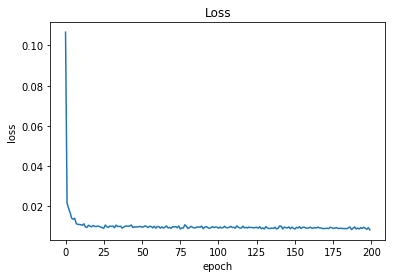

In [451]:
history = model.fit(x_train, y_train, epochs=200, batch_size=16, verbose=0, shuffle=True, validation_split=0.2)

plt.plot(history.history["mean_squared_error"], label="mean_squared_error")
plt.title("Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## 2.4 Predição

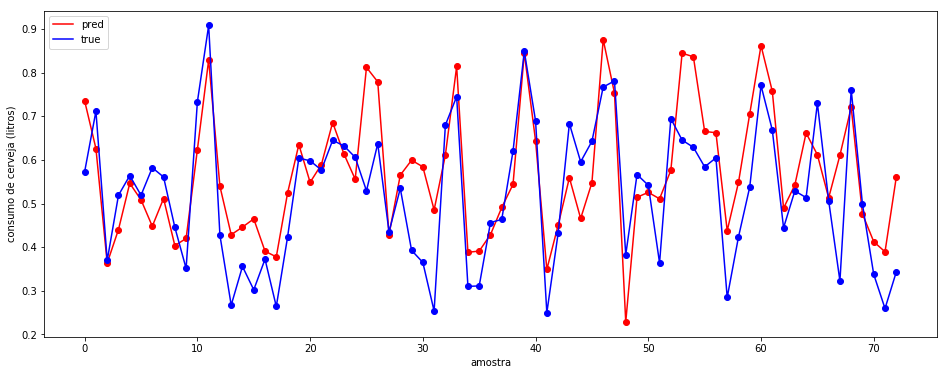

In [453]:
pred = model.predict(x_test).flatten()

plt.figure(figsize=(16,6))
plt.plot(pred, 'ro')
plt.plot(pred,'r' ,label="pred")
plt.plot(y_test, 'bo')
plt.plot(y_test, 'b', label="true")
plt.legend(loc='upper left')
plt.ylabel('consumo de cerveja (litros)')
plt.xlabel('amostra')
plt.show()

## 2.5 Precisão

In [463]:
values = []

for p, t in zip(pred, y_test):
    dif = (t - p)/t
    
    if dif < 0:
        dif = dif * -1.0
    
    values.append(dif)
    
np.mean(values)

0.21268687096591499

E média, os valores previstos possuem um erro de aproximadamente 21,26%